In [2]:
import pandas as pd 
import numpy as np 
import datetime as dt 
from matplotlib import pyplot as plt 

In [3]:
#wk 1 3/29-4/1 
#wk 2 4/4 - 4/8
df = pd.read_csv('spy_options.csv')

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.head()

,date,callExp,ticker,underlying,strike,bid,ask,days_maturity,interest
0,3/22/22 6:29,4/14/22,SPY,445.835,425,23.65,23.86,23,0.01
1,3/22/22 6:29,4/14/22,SPY,445.835,426,22.85,23.20,23,0.01
2,3/22/22 6:29,4/14/22,SPY,445.835,427,22.03,22.21,23,0.01
3,3/22/22 6:29,4/14/22,SPY,445.835,428,21.19,21.34,23,0.01
4,3/22/22 6:29,4/14/22,SPY,445.835,429,20.40,20.53,23,0.01


In [6]:
for i in range(len(df)):
    df['date'][i] = pd.to_datetime(df['date'][i])

/var/folders/qs/08lrvdq116j2p_7gkyvmdryw0000gn/T/ipykernel_13503/2616375780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i] = pd.to_datetime(df['date'][i])


In [19]:
#week 1 3/29 - 4/1
wk_1 = df.loc[df['date']>= dt.datetime(2022,3,29)]
wk_1 = wk_1.loc[df['date']<= dt.datetime(2022,4,2)]
#week 2 4/4 - 4/8
wk_2 = df.loc[df['date']>= dt.datetime(2022,4,4)]
wk_2 = wk_2.loc[df['date']<= dt.datetime(2022,4,9)]

In [39]:
wk_1['vol'] = 0.0
wk_2['vol'] = 0.0

wk_1 = wk_1.reset_index(drop=True)
wk_2 = wk_2.reset_index(drop=True)

In [58]:
import black_scholes_calc as other

In [59]:
dh = wk_1.head(10)

In [61]:
dh

,date,callExp,ticker,underlying,strike,bid,ask,days_maturity,interest,vol
0,2022-03-29 06:29:00,4/14/22,SPY,459.805,436,21.55,22.22,16,0.01,0.0
1,2022-03-29 06:29:00,4/14/22,SPY,459.805,437,20.66,21.32,16,0.01,0.0
2,2022-03-29 06:29:00,4/14/22,SPY,459.805,438,19.78,20.41,16,0.01,0.0
3,2022-03-29 06:29:00,4/14/22,SPY,459.805,439,18.93,19.52,16,0.01,0.0
4,2022-03-29 06:29:00,4/14/22,SPY,459.805,440,18.10,18.48,16,0.01,0.0
5,2022-03-29 06:29:00,4/14/22,SPY,459.805,441,17.18,17.66,16,0.01,0.0
6,2022-03-29 06:29:00,4/14/22,SPY,459.805,442,16.34,16.93,16,0.01,0.0
7,2022-03-29 06:29:00,4/14/22,SPY,459.805,443,15.50,16.08,16,0.01,0.0
8,2022-03-29 06:29:00,4/14/22,SPY,459.805,444,14.83,15.15,16,0.01,0.0
9,2022-03-29 06:29:00,4/14/22,SPY,459.805,445,13.98,14.38,16,0.01,0.0


In [67]:
for i in range(len(wk_2)):
    s = wk_2['underlying'][i]
    k = wk_2['strike'][i]
    r = wk_2['interest'][i]
    t = wk_2['days_maturity'][i]/365
    C = (wk_2['bid'][i]+wk_2['ask'][i])/2.0
    wk_2['vol'][i] = other.iv(s,k,t,r,C)


/var/folders/qs/08lrvdq116j2p_7gkyvmdryw0000gn/T/ipykernel_13503/2704133441.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wk_2['vol'][i] = other.iv(s,k,t,r,C)


In [68]:
print(wk_1['vol'].mean(), wk_2['vol'].mean())

0.141179916449231 0.17501913234768438


In [70]:
wk_1.to_csv("3_29_to_4_1.csv")
wk_2.to_csv("4_4_to_4_8.csv")

In [71]:
from matplotlib import pyplot as plt

In [91]:
df_1 = wk_1
df_2 = wk_2

In [92]:
df_1 = df_1.loc[df_1['vol'] > 0.05]
df_1 = df_1.loc[df_1['vol'] < 0.9]

df_2 = df_2.loc[df_2['vol'] > 0.05]
df_2 = df_2.loc[df_2['vol'] < 0.9]

df_1['pct_away'] = 0.0
df_2['pct_away'] = 0.0

df_1 = df_1.reset_index(drop=True)
df_2 = df_2.reset_index(drop=True)

In [93]:
for i in range(len(df_1)):
    df_1['pct_away'][i] = ((df_1['strike'][i]/df_1['underlying'][i])-1)*100

/var/folders/qs/08lrvdq116j2p_7gkyvmdryw0000gn/T/ipykernel_13503/311042427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['pct_away'][i] = ((df_1['strike'][i]/df_1['underlying'][i])-1)*100


In [94]:
for i in range(len(df_2)):
    df_2['pct_away'][i] = ((df_2['strike'][i]/df_2['underlying'][i])-1)*100

/var/folders/qs/08lrvdq116j2p_7gkyvmdryw0000gn/T/ipykernel_13503/3497575406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['pct_away'][i] = ((df_2['strike'][i]/df_2['underlying'][i])-1)*100


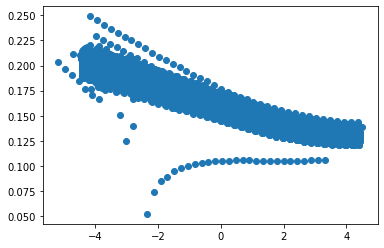

In [95]:
plt.scatter(df_1['pct_away'],df_1['vol'])

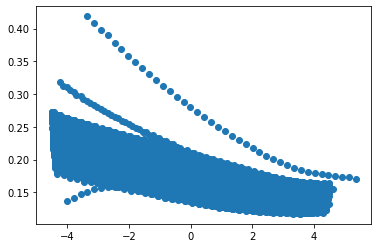

In [96]:
plt.scatter(df_2['pct_away'],df_2['vol'])

In [97]:
df_1.to_csv("3_29_to_4_1.csv")
df_2.to_csv("4_4_to_4_8.csv")